In [1]:
#pip install pydotplus

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
A = pd.read_csv("D:/Work/Gaurav/ETLHIVE/Data sets/training_set.csv")
B = pd.read_csv("D:/Work/Gaurav/ETLHIVE/Data sets/testing_set.csv")

# DATA PROFILING

In [4]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [7]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# PREPROCESSING for EDA

Dropping unnecessory columns

In [8]:
A = A.drop(labels=['Loan_ID'],axis=1)
B = B.drop(labels=['Loan_ID'],axis=1)

Missing Data Treatment

In [9]:
A.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
B.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
A.Credit_History = A.Credit_History.fillna(1)
w = []
for i in A.Credit_History:
    w.append(int(i))
A.Credit_History = w

In [12]:
B.Credit_History = B.Credit_History.fillna(1)
w = []
for i in B.Credit_History:
    w.append(int(i))
B.Credit_History = w

In [13]:
def MDT(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["CT"])
    missingcolumns = list(Q[Q.CT > 0].index)
    for i in missingcolumns:
        if(df[i].dtypes=="object"):
            replacer = df[i].mode()[0]
            df[i] = df[i].fillna(replacer)
        else:
            replacer = df[i].mean()
            df[i] = df[i].fillna(replacer)

In [14]:
MDT(A)
MDT(B)

In [15]:
A.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
B.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Exploratory Data Analysis

In [17]:
Y = A[["Loan_Status"]]
X = A.drop(labels=["Loan_Status"],axis=1)

In [18]:
cat = []
con = []
for i in X.columns:
    if (X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [19]:
cat.append("Credit_History")
con.remove("Credit_History")

In [20]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History']

In [21]:
con

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

For Catogorical calumns - CountPlot

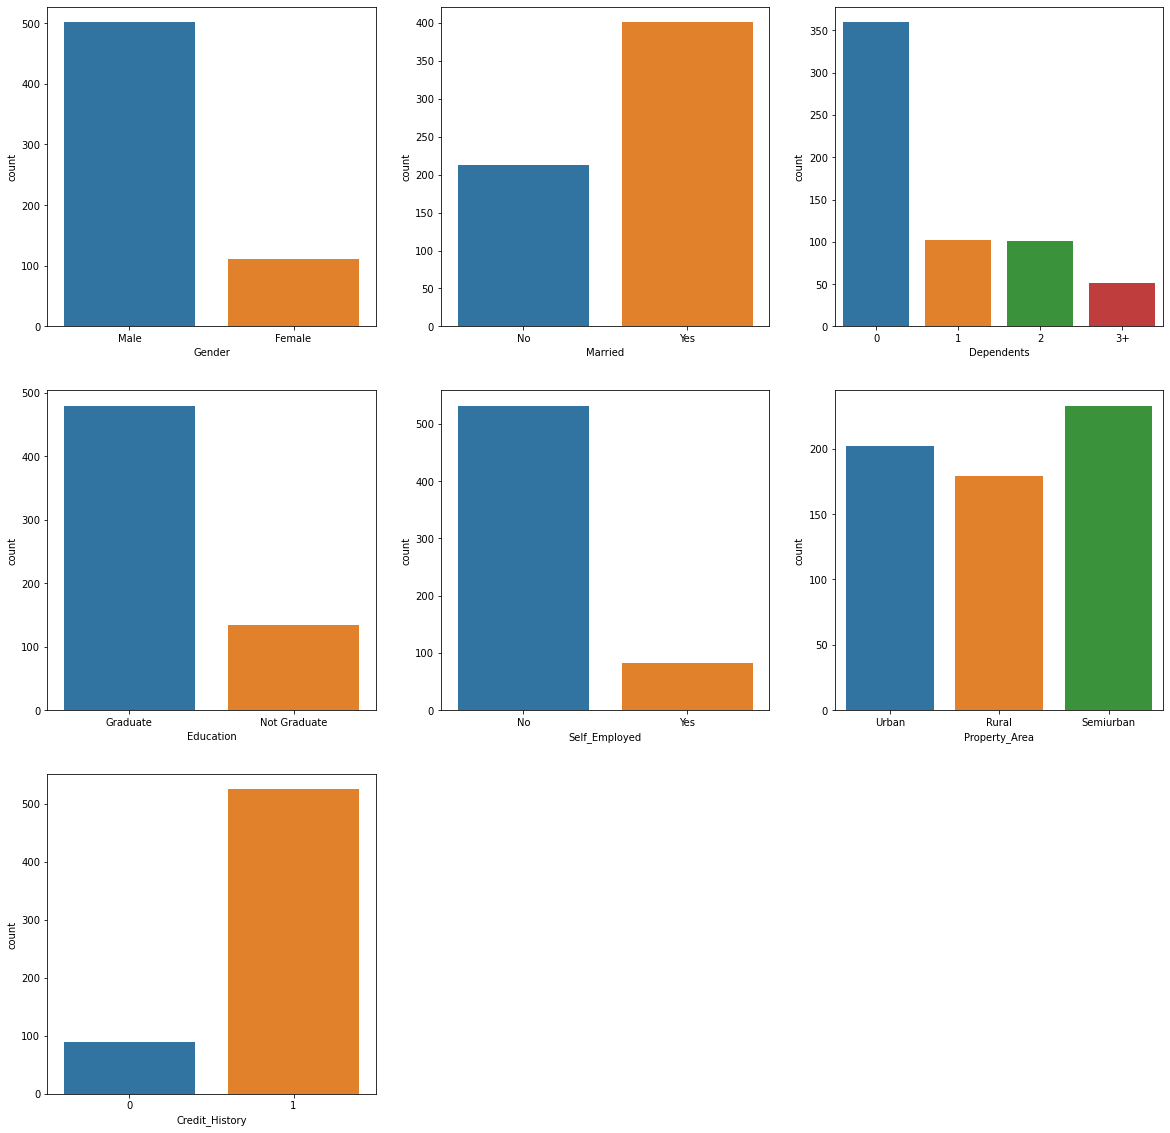

In [22]:
import matplotlib.pyplot as plt
from seaborn import countplot
plt.figure(figsize=(20,20))
m = 1
for i in cat:
    plt.subplot(3,3,m)
    countplot(A[i])
    m = m + 1

For Continious columns - ANOVA

In [23]:
def ANOVA(df,cat,con):
    from statsmodels.formula.api import ols
    rel = con + "~" + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = pd.DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)

In [24]:
anova_results = []
for i in con:
    anova_results.append(ANOVA(A,"Loan_Status",i))

In [25]:
list(zip(con,anova_results))

[('ApplicantIncome', 0.903),
 ('CoapplicantIncome', 0.142),
 ('LoanAmount', 0.368),
 ('Loan_Amount_Term', 0.604)]

# PREPROCESSING for MACHINE LEARNING

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
XS1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [27]:
XS1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072651,-0.554368,0.000000,0.279851
1,0.000000,-0.038610,-0.219273,0.279851
2,-0.394096,-0.554368,-0.957641,0.279851
3,-0.462412,0.252103,-0.314547,0.279851
4,0.097389,-0.554368,-0.064454,0.279851


In [28]:
XS2 = pd.get_dummies(X[cat])

In [29]:
XS2.head()

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [30]:
X = XS1.join(XS2)

In [31]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072651,-0.554368,0.000000,0.279851,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.000000,-0.038610,-0.219273,0.279851,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.462412,0.252103,-0.314547,0.279851,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.097389,-0.554368,-0.064454,0.279851,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [32]:
X.shape

(614, 20)

# CREATING MACHINE LEARNING MODEL

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=10)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()

In [35]:
def makemodel(mo):
    model = mo.fit(xtrain,ytrain)
    pred_ts = model.predict(xtest)
    pred_tr = model.predict(xtrain)
    from sklearn.metrics import accuracy_score
    ts_acc = round(accuracy_score(ytest,pred_ts),3)
    tr_acc = round(accuracy_score(ytrain,pred_tr),3)
    print("training accuracy: ",tr_acc)
    print("testing_accuracy: ",ts_acc)

In [36]:
makemodel(lr)

training accuracy:  0.817
testing_accuracy:  0.797


In [37]:
makemodel(dtc)

training accuracy:  1.0
testing_accuracy:  0.683


In [38]:
makemodel(rfc)

training accuracy:  1.0
testing_accuracy:  0.748


In [39]:
makemodel(abc)

training accuracy:  0.843
testing_accuracy:  0.764


# TUNING

In [40]:
dtc = DecisionTreeClassifier(random_state=2,max_depth=7)
rfc = RandomForestClassifier(random_state=10,max_depth=3,min_samples_leaf=5)
abc = AdaBoostClassifier(DecisionTreeClassifier(random_state=7,max_depth=4))

In [41]:
makemodel(dtc)

training accuracy:  0.872
testing_accuracy:  0.805


In [42]:
makemodel(rfc)

training accuracy:  0.813
testing_accuracy:  0.797


In [43]:
makemodel(abc)

training accuracy:  1.0
testing_accuracy:  0.78


# APPLYING BEST MACHINE LEARNING MODEL ON TESTING SET

In [44]:
B.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1,Urban


In [45]:
XT = B

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
XT1 = pd.DataFrame(ss.fit_transform(XT[con]),columns=con)

In [47]:
XT2 = pd.get_dummies(XT[cat])

In [48]:
XT = XT1.join(XT2)

In [49]:
XT.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180807,0.270603,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,-0.502774,0.418877,-0.593671,0.270603,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.955139,0.270603,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [50]:
XT.shape

(367, 20)

In [51]:
dtc = DecisionTreeClassifier(random_state=2,max_depth=7)
model = dtc.fit(X,Y)
Z = model.predict(XT)

In [52]:
B["Predicted_loan_status"]=Z

In [53]:
B.Predicted_loan_status.value_counts()

Y    295
N     72
Name: Predicted_loan_status, dtype: int64

In [54]:
B.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_loan_status
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1,Urban,Y
